In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Estatísticas Descritivas:
            Quantity      UnitPrice     TotalSales
count  392692.000000  392692.000000  392692.000000
mean       13.119702       3.125914      22.631500
std       180.492832      22.241836     311.099224
min         1.000000       0.001000       0.001000
25%         2.000000       1.250000       4.950000
50%         6.000000       1.950000      12.450000
75%        12.000000       3.750000      19.800000
max     80995.000000    8142.750000  168469.600000


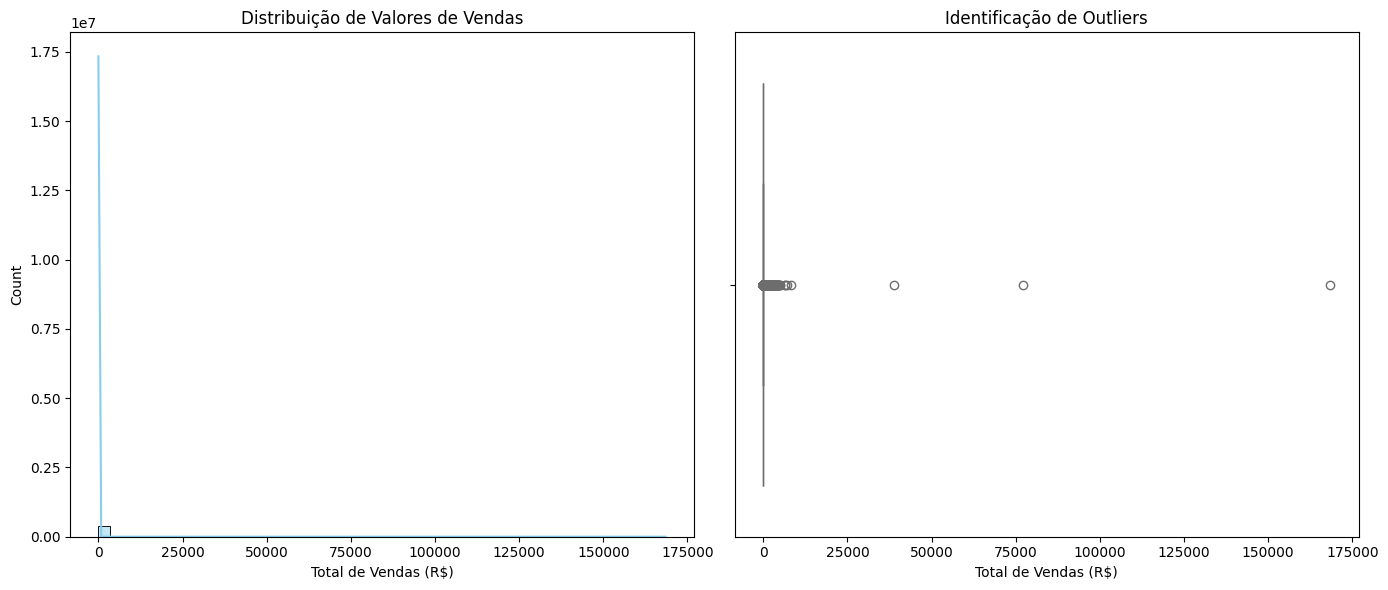

/tmp/ipykernel_10925/574130727.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentages.values, y=percentages.index, palette="viridis")


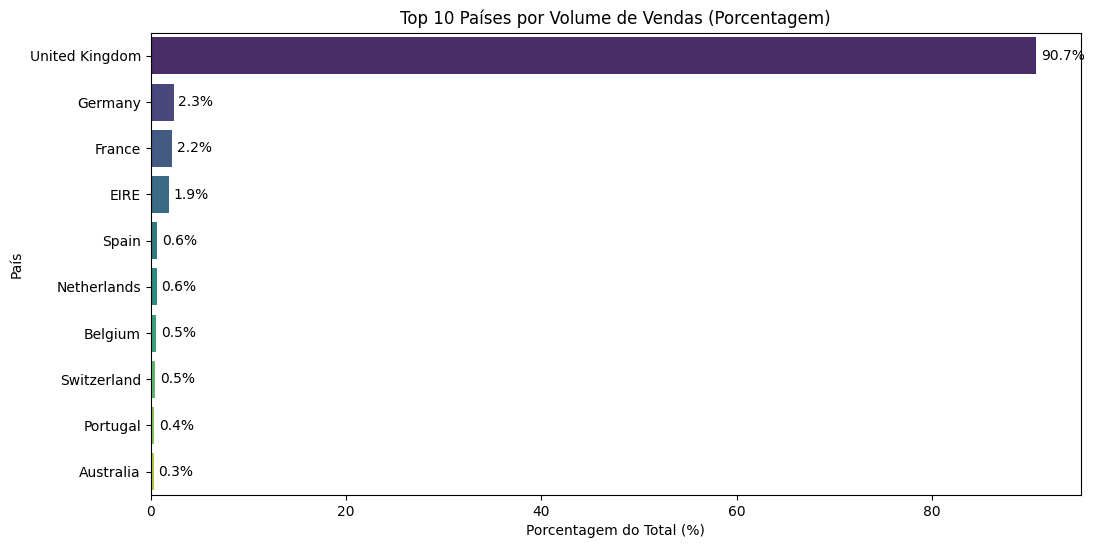

/tmp/ipykernel_10925/574130727.py:48: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('InvoiceDate')['TotalSales'].resample('M').sum()


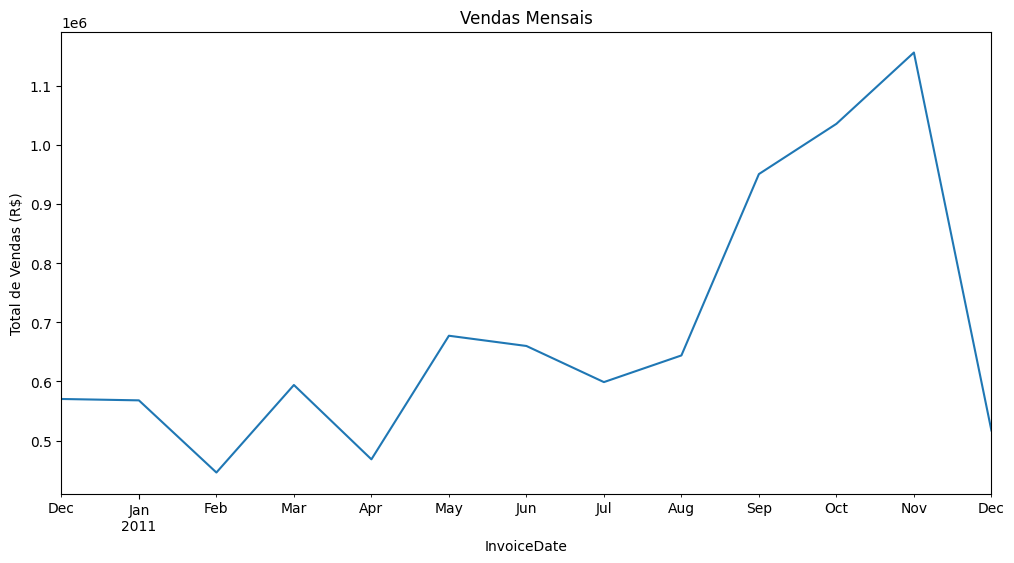

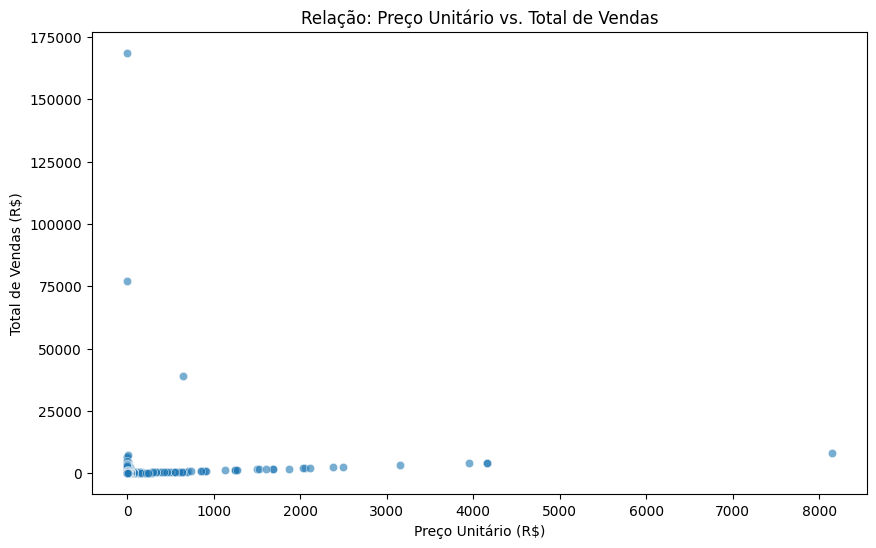

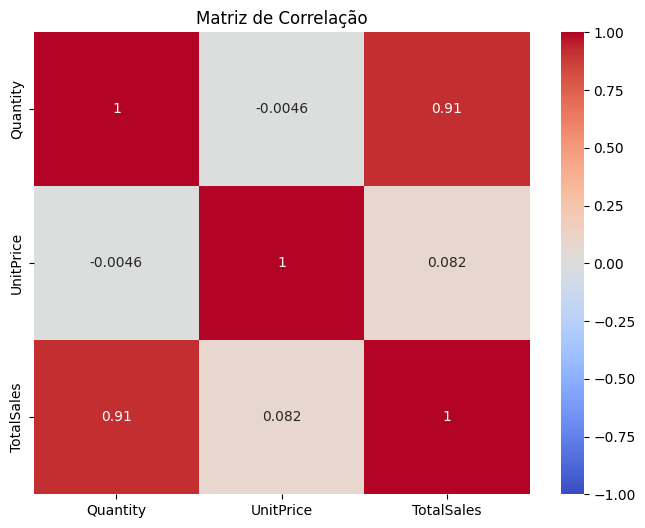

In [ ]:
df = pd.read_csv('../data/ecommerce_clean.csv', encoding='latin1')

# 1. Estatísticas descritivas
print("Estatísticas Descritivas:")
print(df[['Quantity', 'UnitPrice', 'TotalSales']].describe())

#2 Distribuição de Vendas (Histograma + Boxplot)
plt.figure(figsize=(14, 6))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(df['TotalSales'], bins=50, kde=True, color='skyblue')
plt.title('Distribuição de Valores de Vendas')
plt.xlabel('Total de Vendas (R$)')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['TotalSales'], color='salmon')
plt.title('Identificação de Outliers')
plt.xlabel('Total de Vendas (R$)')

plt.tight_layout()
plt.show()

# 3. Top 10 países por vendas
top_countries = df['Country'].value_counts().head(10)
total_top10 = top_countries.sum()
percentages = (top_countries / total_top10) * 100  # Porcentagem

# Criar o gráfico de barras com as porcentagens
plt.figure(figsize=(12, 6))
sns.barplot(x=percentages.values, y=percentages.index, palette="viridis")

#Adicionar rótulos de porcentagem nas barras
for i, v in enumerate(percentages.values):
    plt.text(v + 0.5, i, f"{v:.1f}%", color='black', ha='left', va='center')

plt.title('Top 10 Países por Volume de Vendas (Porcentagem)')
plt.xlabel('Porcentagem do Total (%)')
plt.ylabel('País')
plt.show()

# 4. Série temporal de vendas (agregado mensal)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
monthly_sales = df.set_index('InvoiceDate')['TotalSales'].resample('M').sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Vendas Mensais')
plt.ylabel('Total de Vendas (R$)')
plt.show()

#5.  Relação entre Variáveis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UnitPrice', y='TotalSales', data=df, alpha=0.6)
plt.title('Relação: Preço Unitário vs. Total de Vendas')
plt.xlabel('Preço Unitário (R$)')
plt.ylabel('Total de Vendas (R$)')
plt.show()


#6. Correlações entre Variáveis (Heatmap)
corr_matrix = df[['Quantity', 'UnitPrice', 'TotalSales']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()